# 12.pandas

Pandas 名字衍生自术语 "panel data"（面板数据）和 "Python data analysis"（Python 数据分析）。

pandas是基于numpy数组构建的，但二者最大的不同是pandas是专门为处理表格和混杂数据设计的，比较契合统计分析中的表结构，而numpy更适合处理统一的数值数组数据。pandas数组结构有一维Series和二维DataFrame。

In [1]:
import pandas as pd
pd.__version__ 

'1.5.3'

## 12.1创建

### 12.1.1 Series

pandas.Series( data, index, dtype, name, copy)

data：一组数据(ndarray 类型)。<br/>

index：数据索引标签，如果不指定，默认从 0 开始。<br/>

dtype：数据类型<br/>

name：设置名称。<br/>

copy：拷贝数据，默认为 False。<br/>

In [2]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

### 12.1.2创建Dataframe

pandas.DataFrame( data, index, columns, dtype, copy)

data：一组数据(ndarray、series, map, lists, dict 等类型)。<br/>

index：索引值，或者可以称为行标签。<br/>

columns：列标签，默认为 RangeIndex (0, 1, 2, …, n) 。<br/>

dtype：数据类型。<br/>

copy：拷贝数据，默认为 False。<br/>

In [4]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

,Yes,No
0,50,131
1,21,2


not limited to integers

In [5]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


In [6]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


## 12.2读文件

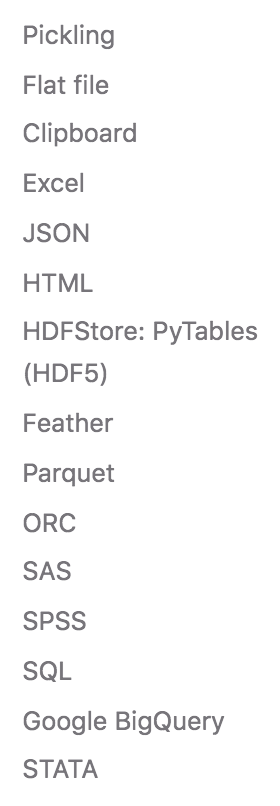

CSV（Comma-Separated Values，逗号分隔值，有时也称为字符分隔值，因为分隔字符也可以不是逗号），其文件以纯文本形式存储表格数据（数字和文本）。

pandas.read_csv

In [8]:
import pandas as pd
df_example=pd.read_excel('example.xlsx')
df_example

,Unnamed: 0,姓名,数学,英语,语文,总分
0,0,张三,46,98,90,234
1,1,李四,78,86,89,253
2,2,王五,89,90,89,268
3,3,刘七,56,65,70,191
4,4,郭八,90,80,91,261
5,5,陈九,99,78,76,253
6,6,姚十,76,67,60,203


In [9]:
type(df_example)

pandas.core.frame.DataFrame

In [10]:
df_example.head()

,Unnamed: 0,姓名,数学,英语,语文,总分
0,0,张三,46,98,90,234
1,1,李四,78,86,89,253
2,2,王五,89,90,89,268
3,3,刘七,56,65,70,191
4,4,郭八,90,80,91,261


In [ ]:
type(df_example)

In [11]:
df_example.shape

(7, 6)

In [12]:
df_example.tail()

,Unnamed: 0,姓名,数学,英语,语文,总分
2,2,王五,89,90,89,268
3,3,刘七,56,65,70,191
4,4,郭八,90,80,91,261
5,5,陈九,99,78,76,253
6,6,姚十,76,67,60,203


In [2]:
df_example.describe()

,数学,英语,语文,总分
count,7.000000,7.000000,7.000000,7.000000
mean,76.285714,80.571429,80.714286,237.571429
std,19.137348,11.942322,12.216304,29.798530
min,46.000000,65.000000,60.000000,191.000000
25%,66.000000,72.500000,73.000000,218.500000
50%,78.000000,80.000000,89.000000,253.000000
75%,89.500000,88.000000,89.500000,257.000000
max,99.000000,98.000000,91.000000,268.000000


## 12.3 Indexing, Selecting & Assigning

In [4]:
df_example['数学']

0    46
1    78
2    89
3    56
4    90
5    99
6    76
Name: 数学, dtype: int64

In [5]:
df_example['数学'][2]

89

In [6]:
df_example.iloc[2,:]

姓名     王五
数学     89
英语     90
语文     89
总分    268
Name: 2, dtype: object

Both loc and iloc are row-first, column-second. This is the opposite of what we do in native Python, which is column-first, row-second.

iloc，即index locate 用index索引进行定位，所以参数是整型<br/>
loc，则可以使用column名和index名进行定位<br/>
iloc使用索引定位的时候，因为是索引，所以，会按照索引的规则取值，如：[1:5] 会取出 1,2,3,4 这4个值。<br/>
但是loc按照label标签取值则不是这样的。如：[‘A’:‘C’] A,B,C 都会取出来。<br/>

In [8]:
df_example.iloc[[0,2,3],:]

,姓名,数学,英语,语文,总分
0,张三,46,98,90,234
2,王五,89,90,89,268
3,刘七,56,65,70,191


In [9]:
df_example.iloc[2,3]

89

In [10]:
df_example.iloc[-6:5,2]

1    86
2    90
3    65
4    80
Name: 英语, dtype: int64

In [7]:
df_example.loc[3,'语文']

70

In [11]:
df_example.loc[(df_example.loc[:,'姓名']=='张三') | (df_example.loc[:,'数学'] >= 90)]

,姓名,数学,英语,语文,总分
0,张三,46,98,90,234
4,郭八,90,80,91,261
5,陈九,99,78,76,253


In [12]:
df_example['数学']=90
df_example

,姓名,数学,英语,语文,总分
0,张三,90,98,90,234
1,李四,90,86,89,253
2,王五,90,90,89,268
3,刘七,90,65,70,191
4,郭八,90,80,91,261
5,陈九,90,78,76,253
6,姚十,90,67,60,203


In [14]:
df_example['化学']=90
df_example

,姓名,数学,英语,语文,总分,张三,化学
0,张三,90,98,90,234,90,90
1,李四,90,86,89,253,90,90
2,王五,90,90,89,268,90,90
3,刘七,90,65,70,191,90,90
4,郭八,90,80,91,261,90,90
5,陈九,90,78,76,253,90,90
6,姚十,90,67,60,203,90,90


In [16]:
df_example_cmean = df_example['语文'].mean()
print(df_example_cmean)
df_example['语文'].map(lambda c: c -df_example_cmean)

80.71428571428571


0     9.285714
1     8.285714
2     8.285714
3   -10.714286
4    10.285714
5    -4.714286
6   -20.714286
Name: 语文, dtype: float64

In [17]:
df_example['语文'].apply(lambda c: c -df_example_cmean)

0     9.285714
1     8.285714
2     8.285714
3   -10.714286
4    10.285714
5    -4.714286
6   -20.714286
Name: 语文, dtype: float64

In [18]:
import numpy as np
df_example['语文'].apply(np.square)

0    8100
1    7921
2    7921
3    4900
4    8281
5    5776
6    3600
Name: 语文, dtype: int64

In [19]:
def x_square(x):
    x_square=np.square(x)
    return x_square
(df_example['语文']+df_example['数学']).apply(x_square)

0    32400
1    32041
2    32041
3    25600
4    32761
5    27556
6    22500
dtype: int64

In [20]:
df_example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   姓名      7 non-null      object
 1   数学      7 non-null      int64 
 2   英语      7 non-null      int64 
 3   语文      7 non-null      int64 
 4   总分      7 non-null      int64 
 5   张三      7 non-null      int64 
 6   化学      7 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 520.0+ bytes


In [21]:
df_example['语文'].unique()#去掉重复的

array([90, 89, 70, 91, 76, 60])

In [22]:
df_example['语文'].value_counts()

89    2
70    1
76    1
91    1
90    1
60    1
Name: 语文, dtype: int64

## 12.4 Grouping and Sorting

In [24]:
group1=df_example.groupby('总分')
type(group1)
group1

In [25]:
list(group1)

[(191,
     姓名  数学  英语  语文   总分  张三  化学
  3  刘七  90  65  70  191  90  90),
 (203,
     姓名  数学  英语  语文   总分  张三  化学
  6  姚十  90  67  60  203  90  90),
 (234,
     姓名  数学  英语  语文   总分  张三  化学
  0  张三  90  98  90  234  90  90),
 (253,
     姓名  数学  英语  语文   总分  张三  化学
  1  李四  90  86  89  253  90  90
  5  陈九  90  78  76  253  90  90),
 (261,
     姓名  数学  英语  语文   总分  张三  化学
  4  郭八  90  80  91  261  90  90),
 (268,
     姓名  数学  英语  语文   总分  张三  化学
  2  王五  90  90  89  268  90  90)]

In [26]:
group1.count()

,姓名,数学,英语,语文,张三,化学
总分,,,,,,
191,1,1,1,1,1,1
203,1,1,1,1,1,1
234,1,1,1,1,1,1
253,2,2,2,2,2,2
261,1,1,1,1,1,1
268,1,1,1,1,1,1


In [27]:
group2=df_example.groupby(['总分','语文'])
list(group2)

[((191, 70),
     姓名  数学  英语  语文   总分  张三  化学
  3  刘七  90  65  70  191  90  90),
 ((203, 60),
     姓名  数学  英语  语文   总分  张三  化学
  6  姚十  90  67  60  203  90  90),
 ((234, 90),
     姓名  数学  英语  语文   总分  张三  化学
  0  张三  90  98  90  234  90  90),
 ((253, 76),
     姓名  数学  英语  语文   总分  张三  化学
  5  陈九  90  78  76  253  90  90),
 ((253, 89),
     姓名  数学  英语  语文   总分  张三  化学
  1  李四  90  86  89  253  90  90),
 ((261, 91),
     姓名  数学  英语  语文   总分  张三  化学
  4  郭八  90  80  91  261  90  90),
 ((268, 89),
     姓名  数学  英语  语文   总分  张三  化学
  2  王五  90  90  89  268  90  90)]

In [28]:
group2.count()

姓名  数学  英语  张三  化学
总分  语文                    
191 70   1   1   1   1   1
203 60   1   1   1   1   1
234 90   1   1   1   1   1
253 76   1   1   1   1   1
    89   1   1   1   1   1
261 91   1   1   1   1   1
268 89   1   1   1   1   1

In [14]:
df_wb=pd.read_excel('Workbook1.xlsx')
df_wb

,class,age,name,math,chinese
0,1,7,Jack,56.0,90
1,1,7,June,87.0,86
2,2,8,Shawn,98.0,90
3,2,6,Tom,67.0,75
4,3,7,Rose,78.0,65
5,3,8,Emily,86.0,50
6,1,9,Jame,60.0,70
7,1,8,Tim,NaN,89


In [30]:
group3=df_wb.groupby(['class','age'])
list(group3)

[((1, 7),
     class  age  name  math  chinese
  0      1    7  Jack  56.0       90
  1      1    7  June  87.0       86),
 ((1, 8),
     class  age name  math  chinese
  7      1    8  Tim   NaN       89),
 ((1, 9),
     class  age  name  math  chinese
  6      1    9  Jame  60.0       70),
 ((2, 6),
     class  age name  math  chinese
  3      2    6  Tom  67.0       75),
 ((2, 8),
     class  age   name  math  chinese
  2      2    8  Shawn  98.0       90),
 ((3, 7),
     class  age  name  math  chinese
  4      3    7  Rose  78.0       65),
 ((3, 8),
     class  age   name  math  chinese
  5      3    8  Emily  86.0       50)]

In [31]:
df_wb.groupby(['class']).agg([len, min, max])

age         name              math             chinese        
      len min max  len    min   max  len   min   max     len min max
class                                                               
1       4   7   9    4   Jack   Tim  4.0  56.0  87.0       4  70  90
2       2   6   8    2  Shawn   Tom  2.0  67.0  98.0       2  75  90
3       2   7   8    2  Emily  Rose  2.0  78.0  86.0       2  50  65

In [32]:
df_wb.groupby(['class','age']).agg([len, min, max,sum])

name                         math                    chinese      \
           len    min    max       sum  len   min   max    sum     len min   
class age                                                                    
1     7      2   Jack   June  JackJune  2.0  56.0  87.0  143.0       2  86   
      8      1    Tim    Tim       Tim  1.0   NaN   NaN    0.0       1  89   
      9      1   Jame   Jame      Jame  1.0  60.0  60.0   60.0       1  70   
2     6      1    Tom    Tom       Tom  1.0  67.0  67.0   67.0       1  75   
      8      1  Shawn  Shawn     Shawn  1.0  98.0  98.0   98.0       1  90   
3     7      1   Rose   Rose      Rose  1.0  78.0  78.0   78.0       1  65   
      8      1  Emily  Emily     Emily  1.0  86.0  86.0   86.0       1  50   

                    
          max  sum  
class age           
1     7    90  176  
      8    89   89  
      9    70   70  
2     6    75   75  
      8    90   90  
3     7    65   65  
      8    50   50

In [33]:
df_wb.groupby('class').agg({'math':'max','chinese':'mean'})

,math,chinese
class,,
1,87.0,83.75
2,98.0,82.50
3,86.0,57.50


In [34]:
df_wb.sort_values(by='math', ascending=False)

,class,age,name,math,chinese
2,2,8,Shawn,98.0,90
1,1,7,June,87.0,86
5,3,8,Emily,86.0,50
4,3,7,Rose,78.0,65
3,2,6,Tom,67.0,75
6,1,9,Jame,60.0,70
0,1,7,Jack,56.0,90
7,1,8,Tim,NaN,89


In [37]:
df_wb['avg_score1'] = df_wb.groupby('class')['math'].transform('mean')#新增一列每个班级数学平均成绩
df_wb

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1
0,1,7,Jack,56.0,90,67.666667,67.666667,67.666667
1,1,7,June,87.0,86,67.666667,67.666667,67.666667
2,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000
3,2,6,Tom,67.0,75,82.500000,82.500000,82.500000
4,3,7,Rose,78.0,65,82.000000,82.000000,82.000000
5,3,8,Emily,86.0,50,82.000000,82.000000,82.000000
6,1,9,Jame,60.0,70,67.666667,67.666667,67.666667
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667


In [38]:
def score_line(x):
    if x>=60.0 and x<90.0:
        return 'B'
    if x>=90.0:
        return 'A'
    else:
        return 'C'
df_wb['score_line']=df_wb['math'].apply(score_line)


In [39]:
df_wb

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
0,1,7,Jack,56.0,90,67.666667,67.666667,67.666667,C
1,1,7,June,87.0,86,67.666667,67.666667,67.666667,B
2,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000,A
3,2,6,Tom,67.0,75,82.500000,82.500000,82.500000,B
4,3,7,Rose,78.0,65,82.000000,82.000000,82.000000,B
5,3,8,Emily,86.0,50,82.000000,82.000000,82.000000,B
6,1,9,Jame,60.0,70,67.666667,67.666667,67.666667,B
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667,C


In [40]:
def get_oldest_staff(x):
    df = x.sort_values(by = 'age',ascending=True)
    return df.iloc[-1,:]
oldest_staff = df_wb.groupby('class',as_index=False).apply(get_oldest_staff)
oldest_staff

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
0,1,9,Jame,60.0,70,67.666667,67.666667,67.666667,B
1,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000,A
2,3,8,Emily,86.0,50,82.000000,82.000000,82.000000,B


## 12.5Data Types and Missing Values

In [41]:
df_wb['math'].dtype

dtype('float64')

In [42]:
df_wb.dtypes#多了一个s

class           int64
age             int64
name           object
math          float64
chinese         int64
avg_salary    float64
avg_score     float64
avg_score1    float64
score_line     object
dtype: object

In [44]:
df_wb['chinese'].astype('float64')

0    90.0
1    86.0
2    90.0
3    75.0
4    65.0
5    50.0
6    70.0
7    89.0
Name: chinese, dtype: float64

In [45]:
df_wb

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
0,1,7,Jack,56.0,90,67.666667,67.666667,67.666667,C
1,1,7,June,87.0,86,67.666667,67.666667,67.666667,B
2,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000,A
3,2,6,Tom,67.0,75,82.500000,82.500000,82.500000,B
4,3,7,Rose,78.0,65,82.000000,82.000000,82.000000,B
5,3,8,Emily,86.0,50,82.000000,82.000000,82.000000,B
6,1,9,Jame,60.0,70,67.666667,67.666667,67.666667,B
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667,C


In [46]:
df_non=df_wb[pd.isnull(df_wb['math'])]
df_non

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667,C


In [48]:
df_non.fillna("unknown")

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
7,1,8,Tim,unknown,89,67.666667,67.666667,67.666667,C


In [49]:
df_non.replace("Tim", "Bob")

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
7,1,8,Bob,NaN,89,67.666667,67.666667,67.666667,C


## 12.6Renaming and Combining

In [50]:
df_wb.rename(columns={'class': 'group'})

,group,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
0,1,7,Jack,56.0,90,67.666667,67.666667,67.666667,C
1,1,7,June,87.0,86,67.666667,67.666667,67.666667,B
2,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000,A
3,2,6,Tom,67.0,75,82.500000,82.500000,82.500000,B
4,3,7,Rose,78.0,65,82.000000,82.000000,82.000000,B
5,3,8,Emily,86.0,50,82.000000,82.000000,82.000000,B
6,1,9,Jame,60.0,70,67.666667,67.666667,67.666667,B
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667,C


In [51]:
df_wb

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
0,1,7,Jack,56.0,90,67.666667,67.666667,67.666667,C
1,1,7,June,87.0,86,67.666667,67.666667,67.666667,B
2,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000,A
3,2,6,Tom,67.0,75,82.500000,82.500000,82.500000,B
4,3,7,Rose,78.0,65,82.000000,82.000000,82.000000,B
5,3,8,Emily,86.0,50,82.000000,82.000000,82.000000,B
6,1,9,Jame,60.0,70,67.666667,67.666667,67.666667,B
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667,C


In [52]:
df_wb.rename(index={0: 'firstEntry', 1: 'secondEntry'})

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line
firstEntry,1,7,Jack,56.0,90,67.666667,67.666667,67.666667,C
secondEntry,1,7,June,87.0,86,67.666667,67.666667,67.666667,B
2,2,8,Shawn,98.0,90,82.500000,82.500000,82.500000,A
3,2,6,Tom,67.0,75,82.500000,82.500000,82.500000,B
4,3,7,Rose,78.0,65,82.000000,82.000000,82.000000,B
5,3,8,Emily,86.0,50,82.000000,82.000000,82.000000,B
6,1,9,Jame,60.0,70,67.666667,67.666667,67.666667,B
7,1,8,Tim,NaN,89,67.666667,67.666667,67.666667,C


In [17]:
new_df=pd.concat([df_wb,df_example])
new_df

,class,age,name,math,chinese,Unnamed: 0,姓名,数学,英语,语文,总分
0,1.0,7.0,Jack,56.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,7.0,June,87.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,8.0,Shawn,98.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,6.0,Tom,67.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,7.0,Rose,78.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,8.0,Emily,86.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,9.0,Jame,60.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,8.0,Tim,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,0.0,张三,46.0,98.0,90.0,234.0
1,NaN,NaN,NaN,NaN,NaN,1.0,李四,78.0,86.0,89.0,253.0


In [16]:
df_wb

,class,age,name,math,chinese
0,1,7,Jack,56.0,90
1,1,7,June,87.0,86
2,2,8,Shawn,98.0,90
3,2,6,Tom,67.0,75
4,3,7,Rose,78.0,65
5,3,8,Emily,86.0,50
6,1,9,Jame,60.0,70
7,1,8,Tim,NaN,89


In [56]:
df_example

,姓名,数学,英语,语文,总分,张三,化学
0,张三,90,98,90,234,90,90
1,李四,90,86,89,253,90,90
2,王五,90,90,89,268,90,90
3,刘七,90,65,70,191,90,90
4,郭八,90,80,91,261,90,90
5,陈九,90,78,76,253,90,90
6,姚十,90,67,60,203,90,90


In [54]:
new_df

,class,age,name,math,chinese,avg_salary,avg_score,avg_score1,score_line,姓名,数学,英语,语文,总分,张三,化学
0,1.0,7.0,Jack,56.0,90.0,67.666667,67.666667,67.666667,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,7.0,June,87.0,86.0,67.666667,67.666667,67.666667,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,8.0,Shawn,98.0,90.0,82.500000,82.500000,82.500000,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,6.0,Tom,67.0,75.0,82.500000,82.500000,82.500000,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,7.0,Rose,78.0,65.0,82.000000,82.000000,82.000000,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,8.0,Emily,86.0,50.0,82.000000,82.000000,82.000000,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,9.0,Jame,60.0,70.0,67.666667,67.666667,67.666667,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,8.0,Tim,NaN,89.0,67.666667,67.666667,67.666667,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,张三,90.0,98.0,90.0,234.0,90.0,90.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,李四,90.0,86.0,89.0,253.0,90.0,90.0


In [ ]:
12.6 ExcelFile 与 ExcelWriter

In [3]:
import pandas as pd

data = pd.ExcelFile('example.xlsx')
sheet_names = data.sheet_names
print(sheet_names)

['工作表1']


In [10]:
with pd.ExcelWriter("example.xlsx",mode="a",if_sheet_exists='replace',engine="openpyxl") as writer:

                df_example.to_excel(writer,sheet_name="h1")


In [11]:
data = pd.ExcelFile('example.xlsx')
sheet_names = data.sheet_names
print(sheet_names)

['工作表1', 'h1']


官方文档中：默认值是对于xls使用xlwt，对于xlsx使用openpyxl，对于ods使用odf。因为你用的是xlsx，所以得多加‘engine="openpyxl"’

# miaoming_f@cueb.edu.cn 姓名+学号+python